In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor 


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.datasets._samples_generator import make_regression

Basic Liner Regression

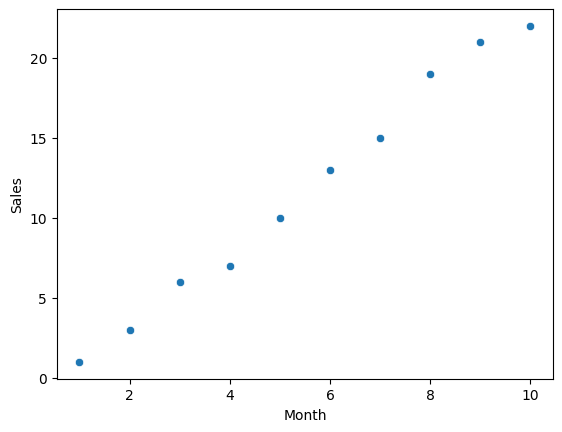

2.466666666666666 -1.8666666666666727


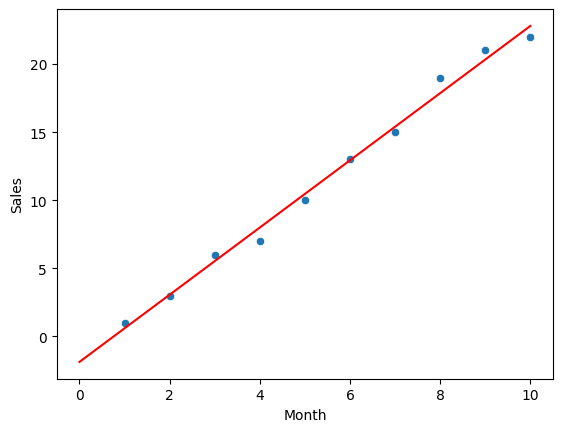

In [2]:
#make a 10x2 matrix that looks like sales data
sales = np.array([[1,2,3,4,5,6,7,8,9,10],[1,3,6,7,10,13,15,19,21,22]])
plot = sns.scatterplot(x=sales[0], y=sales[1])
plot.set(xlabel='Month', ylabel='Sales')
plt.show()
#fit a line to the data
m, b = np.polyfit(sales[0], sales[1], 1)
print(m, b)
#plot the line
plot = sns.scatterplot(x=sales[0], y=sales[1])
plot.set(xlabel='Month', ylabel='Sales')
x = np.linspace(0, 10, 100)
plt.plot(x, m*x+b, color='red')
plt.show()


More Complex Dataset

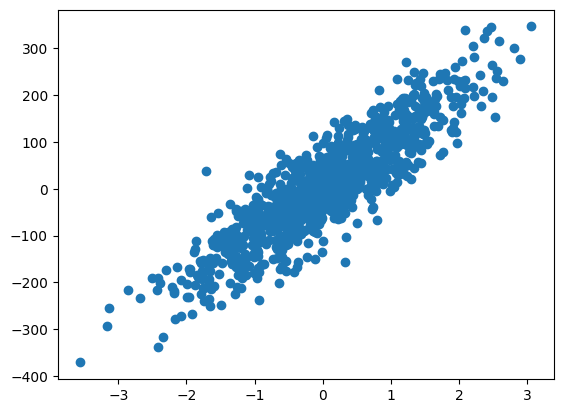

98.70863329220846 1.6077302293465252


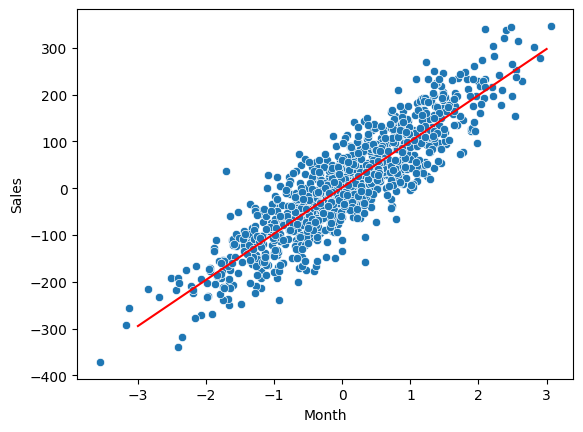

In [3]:
X, y = make_regression(n_samples=1000, n_features=1, noise=50, random_state=8)
plt.scatter(X, y)
X = X.reshape(-1)
sales = np.array([X, y])
plt.show()
#Lets solve it
m, b = np.polyfit(sales[0], sales[1], 1)
print(m, b)

#plot the line
plot = sns.scatterplot(x=sales[0], y=sales[1])
plot.set(xlabel='Month', ylabel='Sales')
x = np.linspace(-3, 3, 2)
plt.plot(x, m*x+b, color='red')
plt.show()

Batch Gradient Decent

999 2854557.812624245
999 m is 86.54220523653785 b is 2.4668712055693085
1999 2702332.2523598433
1999 m is 97.19462901372495 b is 1.8418254719260854
2999 2699947.503971641
2999 m is 98.51899805289779 b is 1.6540858835110364
3999 2699909.079004086
3999 m is 98.68471585274571 b is 1.6158434441373961
4999 2699908.440971899
4999 m is 98.70559480786584 b is 1.609060476116956
5999 2699908.430051796
5999 m is 98.7082443827392 b is 1.60793979176136
6999 2699908.4298594445
6999 m is 98.70858313360552 b is 1.6077623743983915
7999 2699908.429855968
7999 m is 98.70862677360877 b is 1.6077350682135396
8999 2699908.4298559036
8999 m is 98.70863243865308 b is 1.6077309477659918
9999 2699908.4298559027
9999 m is 98.7086331796218 b is 1.607730334903537
Result: y = 98.70863317984923 x + 1.6077303347008345


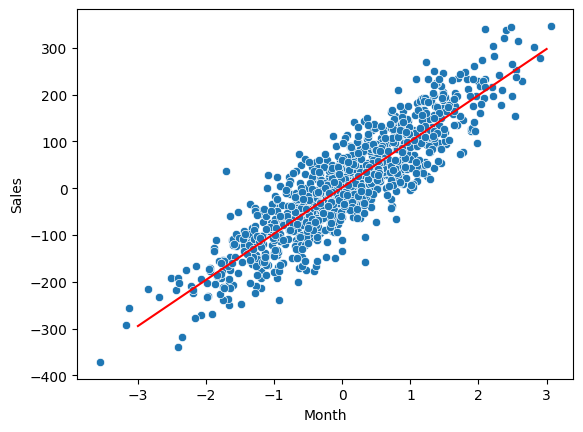

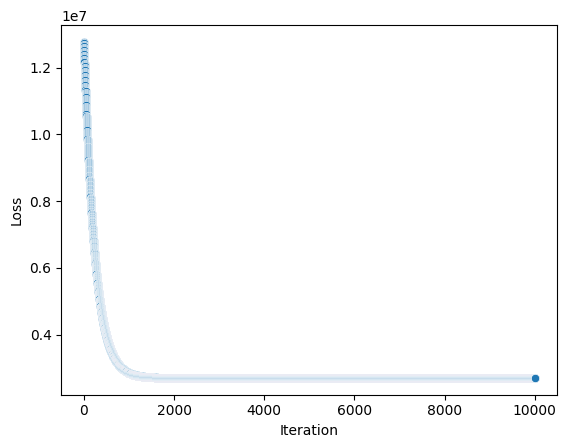

In [4]:
#initialize weight and bias
m = np.random.randn()
b = np.random.randn()

learning_rate = 1e-6
epochs = 10000
losss = []
for t in range(epochs):
    y_pred = m * sales[0] + b
    loss = (np.square(y_pred - sales[1]).sum())
    if t % 1000 == 999:
        print(t, loss)
        print(str(t) + " m is " + str(m) + " b is " + str(b))
    losss.append(loss)
    
    grad_y_pred = 2.0 * (y_pred - sales[1])
    grad_m = (grad_y_pred * sales[0]).sum()
    grad_b = grad_y_pred.sum()#/len(sales[0])

    m -= learning_rate * grad_m
    b -= learning_rate * grad_b

print(f'Result: y = {m} x + {b}')

#plot the line
plot = sns.scatterplot(x=sales[0], y=sales[1])
plot.set(xlabel='Month', ylabel='Sales')
x = np.linspace(-3, 3, 100)
plt.plot(x, m*x+b, color='red') 
plt.show()

#plot the loss
plot = sns.scatterplot(x=range(epochs), y=losss)
plot.set(xlabel='Iteration', ylabel='Loss')
plt.show()


Stochastic Gradient Descent

0 3951.9348893213028
 m is -0.02920739462280792 b is -0.089114186729649
1 10520.840712866937
 m is 0.17707714236546598 b is -0.07836445108390545
2 8073.07773063594
 m is 0.382932410933142 b is -0.06765039801872083
3 148.75547813409406
 m is 0.5883591117395738 b is -0.056971119234334004
4 28.16064666233241
 m is 0.7933512611598088 b is -0.046330688431662215
5 457.55178013575534
 m is 0.9979174487513394 b is -0.035726253491716195
6 27813.114917873805
 m is 1.2020538604708886 b is -0.025159003422131322
7 352.5449331461769
 m is 1.4057644025812694 b is -0.014623656069668946
8 48432.85192581633
 m is 1.6090495194687329 b is -0.004130185326201523
9 24873.58873165766
 m is 1.8119065713271902 b is 0.006330955461374598
10 28368.424973983783
 m is 2.014337913938206 b is 0.01675699935830743
11 7143.667032491175
 m is 2.2163477929126874 b is 0.027145612444454202
12 47700.41268218115
 m is 2.4179341697046484 b is 0.03749815085979288
13 29053.87291347397
 m is 2.619102814074437 b is 0.04781725446358

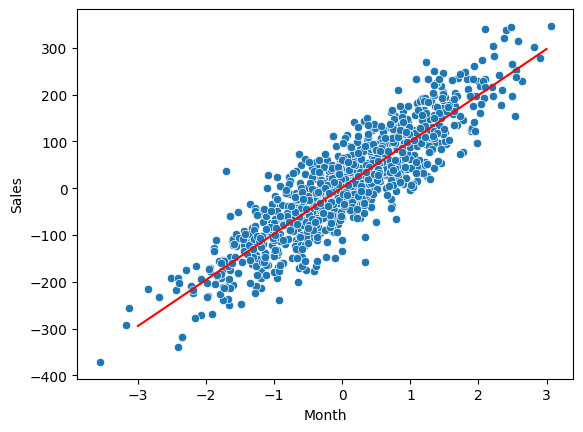

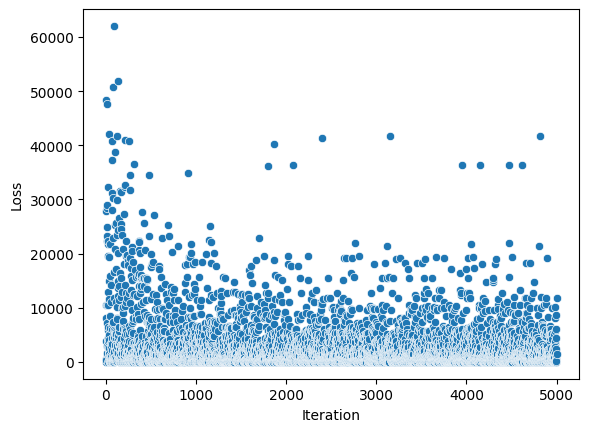

In [5]:
#initialize weight and bias
m = np.random.randn()
b = np.random.randn()

learning_rate = 1e-6
losss = []
epochs = 5000
for t in range(epochs):
    #shuffle the data
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]
    for i in range(len(sales[0])):
        y_pred = m * X[i] + b
        loss = (np.square(y_pred - y[i]))
        
        grad_y_pred = 2.0 * (y_pred - y[i])
        grad_m = (grad_y_pred * X[i])
        grad_b = grad_y_pred.sum()

        m -= learning_rate * grad_m
        b -= learning_rate * grad_b

        if i % 1000 == 999:
            print(t, loss)
            print(" m is " + str(m) + " b is " + str(b))
    losss.append(loss)


print(f'Result: y = {m} x + {b}')

#plot the line
plot = sns.scatterplot(x=sales[0], y=sales[1])
plot.set(xlabel='Month', ylabel='Sales')
x = np.linspace(-3, 3, 100)
plt.plot(x, m*x+b, color='red') 
plt.show()

#plot the loss
plot = sns.scatterplot(x=range(epochs), y=losss)
plot.set(xlabel='Iteration', ylabel='Loss')
plt.show()

Mini-Batch Gradient Descent

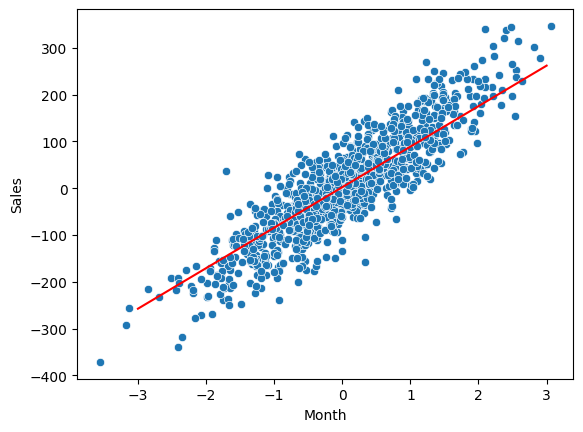

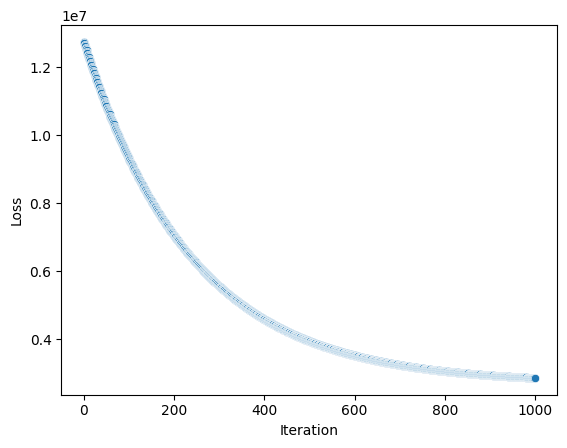

In [6]:
#bad implementation fix
#initialize weight and bias
m = np.random.randn()
b = np.random.randn()

learning_rate = 1e-6
batch_size = 1000
losss = []
epochs = 1000
for t in range(epochs):
    #shuffle the data
    p = np.random.permutation(len(sales[0]))
    sales[0], sales[1] = sales[0][p], sales[1][p]
    for i in range(0, len(sales[0]), batch_size):
        batch_sales = sales[:, i:i+batch_size]
        y_pred = m * batch_sales[0] + b
        loss = (np.square(y_pred - batch_sales[1]).sum())
        
        grad_y_pred = 2.0 * (y_pred - batch_sales[1])
        grad_m = (grad_y_pred * batch_sales[0]).sum()
        grad_b = grad_y_pred.sum()

        m -= learning_rate * grad_m
        b -= learning_rate * grad_b

        if i % 1000 == 999:
            print(t, loss)
            print(" m is " + str(m) + " b is " + str(b))
    losss.append(loss)

#plot the line
plot = sns.scatterplot(x=sales[0], y=sales[1])
plot.set(xlabel='Month', ylabel='Sales')
x = np.linspace(-3, 3, 100)
plt.plot(x, m*x+b, color='red')  
plt.show()

#plot the loss
plot = sns.scatterplot(x=range(epochs), y=losss)
plot.set(xlabel='Iteration', ylabel='Loss')
plt.show()

PyTorch Tensors

In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

#check if pytorch is using GPU
print(torch.cuda.is_available())

True


In [8]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1134, 0.0104, 0.0010],
        [0.5473, 0.4458, 0.6819]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [9]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
#move to GPU
tensor = tensor.to('cuda')
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Device tensor is stored on: cuda:0


In [10]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [11]:
tensor = torch.ones(4, 4) #row, column
# print(f"First row: {tensor[0]}")
# print(f"First column: {tensor[:, 0]}")
# print(f"Last column: {tensor[..., -1]}") # ... means all the other dimensions
tensor[:,1] = 2
print(tensor)

tensor([[1., 2., 1., 1.],
        [1., 2., 1., 1.],
        [1., 2., 1., 1.],
        [1., 2., 1., 1.]])


In [12]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.],
        [1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.],
        [1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.],
        [1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.]])


In [14]:
print(tensor)
# This computes the matrix multiplication between two tensors. y1 and y2 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y2 = tensor.matmul(tensor.T)
print(y2)

m1 = torch.rand(4,6).cuda()
m2 = torch.rand(6,6).cuda()
print(m1@m2)

# This computes the element-wise product. z1 and z2 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)
print(z1)
print(z2)

tensor([[1., 2., 1., 1.],
        [1., 2., 1., 1.],
        [1., 2., 1., 1.],
        [1., 2., 1., 1.]])
tensor([[7., 7., 7., 7.],
        [7., 7., 7., 7.],
        [7., 7., 7., 7.],
        [7., 7., 7., 7.]])
tensor([[0.8740, 0.8880, 1.0495, 0.4894, 0.5121, 1.0463],
        [1.5618, 1.1191, 1.6331, 0.8784, 0.7374, 2.0854],
        [2.4130, 1.7946, 1.9640, 1.0653, 1.1688, 2.6885],
        [2.0876, 1.4384, 1.8368, 0.8669, 0.8116, 2.2450]], device='cuda:0')
tensor([[1., 4., 1., 1.],
        [1., 4., 1., 1.],
        [1., 4., 1., 1.],
        [1., 4., 1., 1.]])
tensor([[1., 4., 1., 1.],
        [1., 4., 1., 1.],
        [1., 4., 1., 1.],
        [1., 4., 1., 1.]])


In [15]:
t = torch.ones(5,2)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
n: [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
t: tensor([[2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.]])
n: [[2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]


In [16]:
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


AutoGrad

In [17]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


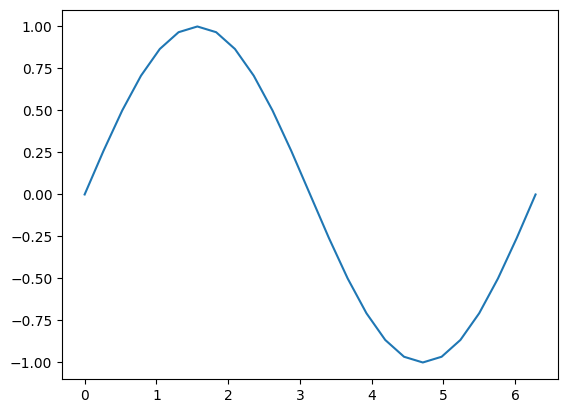

In [18]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())
print(b)

In [19]:
c = 2 * b
print(c)

d = c + 1
print(d)

out = d.sum()
print(out)

print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)
tensor(25., grad_fn=<SumBackward0>)
d:
((<MulBackward0 object at 0x000002567FF2E500>, 0), (None, 0))
((<SinBackward0 object at 0x000002567FF2E530>, 0), (None, 0))
((<AccumulateGrad object at 0x000002567FF2D

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


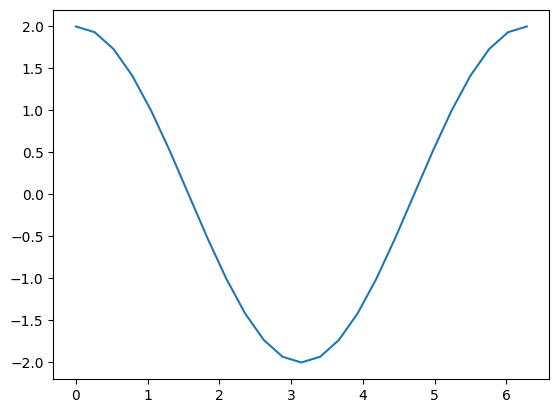

In [20]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

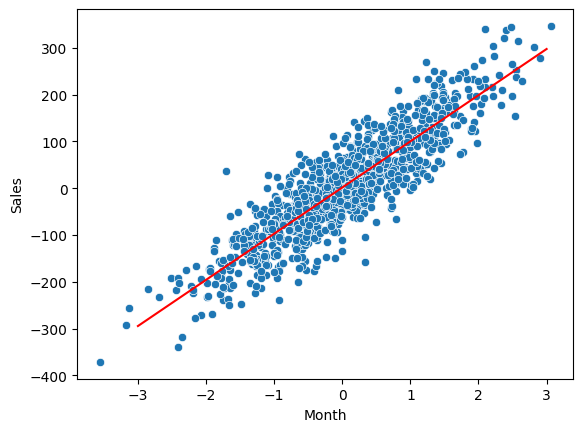

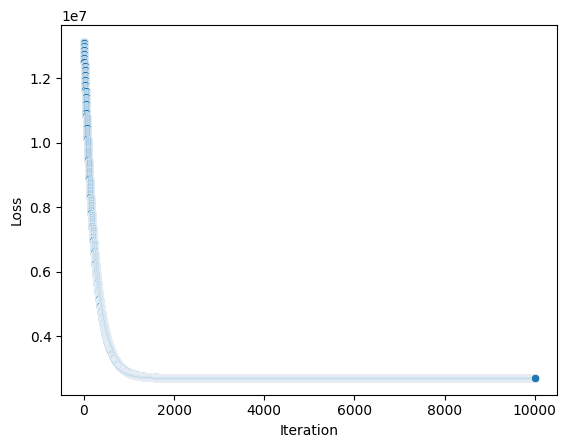

In [21]:
#initialize weight and bias
m = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
sales = torch.tensor(sales)

learning_rate = 1e-6
losss = []
epochs = 10000
for t in range(epochs):
    y_pred = m * sales[0] + b
    loss = (torch.square(y_pred - sales[1]).sum())
    loss.backward()
    
    with torch.no_grad(): # we don't want to track this in the computational graph
        m -= learning_rate * m.grad
        b -= learning_rate * b.grad
        m.grad.zero_() #this is needed because pytorch accumulates the gradients so we need to zero them out
        b.grad.zero_()
        
    losss.append(loss.item())

#plot the line
plot = sns.scatterplot(x=sales[0], y=sales[1])
plot.set(xlabel='Month', ylabel='Sales')
x = np.linspace(-3, 3, 100)
plt.plot(x, m.cpu().detach().numpy()*x+b.cpu().detach().numpy(), color='red')
plt.show()

#plot the loss
plot = sns.scatterplot(x=range(epochs), y=losss)
plot.set(xlabel='Iteration', ylabel='Loss')
plt.show()

Building a nerual network

In [22]:
#What is a linear layer
lin = torch.nn.Linear(3, 2)
x = torch.rand(1, 3)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)
print('\n\nOutput:')
print(y)

Input:
tensor([[0.9749, 0.6332, 0.5194]])


Weight and Bias parameters:
Parameter containing:
tensor([[ 0.1302,  0.3170, -0.2037],
        [-0.1630,  0.2771,  0.0530]], requires_grad=True)
Parameter containing:
tensor([0.3793, 0.3501], requires_grad=True)


Output:
tensor([[0.6012, 0.3942]], grad_fn=<AddmmBackward0>)


In [23]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE*3, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE*3, DIM_OUT, requires_grad=False)

model = TinyModel()
print(model)

TinyModel(
  (layer1): Linear(in_features=1000, out_features=100, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=100, out_features=10, bias=True)
)


In [24]:
print(model.layer2.weight[0].shape)
print(model.layer2.weight)

torch.Size([100])
Parameter containing:
tensor([[-3.9816e-02, -7.6420e-02,  6.6337e-02,  8.8609e-02,  4.6775e-02,
         -9.1724e-02,  6.0608e-02,  5.9232e-02,  5.8501e-02, -1.3928e-02,
         -3.7468e-02,  1.6570e-02,  9.5910e-02, -1.4619e-02, -4.9572e-02,
          4.7393e-02, -4.1848e-02,  4.9756e-04, -3.5999e-02,  2.3355e-02,
          9.9493e-02, -1.2760e-02, -8.1767e-02, -1.1207e-02,  8.0207e-02,
          2.4629e-02,  5.2225e-02, -8.6449e-02, -8.7665e-02, -5.5956e-02,
         -5.0216e-02, -3.5673e-02,  2.5469e-02,  1.5207e-02,  3.7262e-02,
         -7.1604e-03,  9.5967e-02, -8.8790e-02,  7.1705e-02,  4.1050e-02,
         -9.4941e-02, -2.1713e-02, -5.1960e-02, -6.6530e-03, -5.4941e-02,
          8.4941e-02, -3.2251e-02,  5.0441e-02, -2.5159e-02,  2.9117e-02,
          7.2248e-02,  4.6471e-02, -6.3753e-02, -4.7396e-02,  7.7220e-02,
         -6.3627e-02,  9.5024e-03, -4.6907e-02, -8.9227e-02,  3.7755e-02,
         -9.9014e-02, -1.9241e-03,  6.9484e-02, -4.1079e-02,  9.9930e-02

In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(558.1286, grad_fn=<SumBackward0>)


In [26]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0398, -0.0764,  0.0663,  0.0886,  0.0468, -0.0917,  0.0606,  0.0592,
         0.0585, -0.0139], grad_fn=<SliceBackward0>)
tensor([-3.6997, -2.5622, -3.6864,  1.8250, -3.3788, -2.6932,  1.8234, -0.1486,
         1.8442,  6.1531])


In [27]:
optimizer.step()
print(model.layer2.weight[0][0:10])


tensor([-0.0361, -0.0739,  0.0700,  0.0868,  0.0502, -0.0890,  0.0588,  0.0594,
         0.0567, -0.0201], grad_fn=<SliceBackward0>)


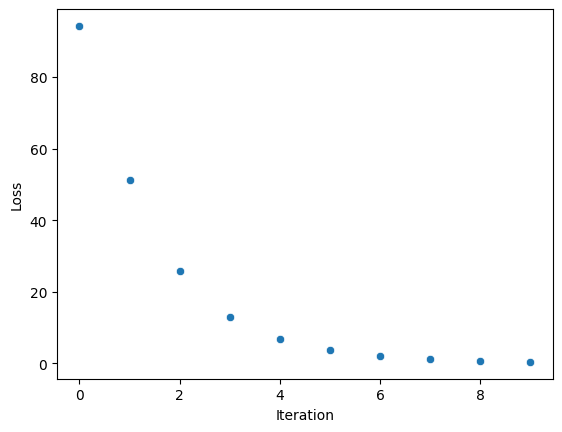

In [28]:
#train the model
losses = []
epochs = 10 
for t in range(epochs):
    for batch in range(0, some_input.shape[0], BATCH_SIZE):
        optimizer.zero_grad()
        prediction = model(some_input[batch:batch+BATCH_SIZE])
        loss = (ideal_output[batch:batch+BATCH_SIZE] - prediction).pow(2).sum()
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

plot = sns.scatterplot(x=range(len(losses)), y=losses)
plot.set(xlabel='Iteration', ylabel='Loss')
plt.show()


In [29]:
# see how accurate the model is
prediction = model(some_input)
loss = (ideal_output - prediction)
print(loss)

tensor([[-5.3392e-02, -3.5669e-02, -3.5582e-02, -2.1808e-02,  2.5066e-03,
         -3.9142e-02, -3.5427e-02, -2.8926e-02,  3.9747e-02,  5.9605e-06],
        [ 9.8713e-02, -5.8261e-02, -2.3199e-03, -7.7134e-02, -6.2897e-02,
          3.2804e-02,  3.9457e-02,  1.1341e-02, -3.4972e-02, -1.2359e-01],
        [ 8.5989e-02,  2.7695e-02, -3.6612e-02, -8.3721e-02,  3.3105e-02,
          6.3134e-02, -7.2908e-02,  4.7269e-02,  7.9324e-03, -3.8595e-02],
        [-3.6277e-02, -5.9652e-02,  2.6548e-02,  6.8155e-02,  3.8999e-02,
          4.8963e-03,  1.7140e-02, -2.3175e-02, -2.9698e-02,  6.0918e-03],
        [-2.1979e-02,  6.7366e-03,  1.1590e-02, -1.9315e-03, -2.3822e-02,
         -8.6020e-03,  5.0497e-03, -4.2345e-04, -4.1923e-03,  6.4804e-03],
        [-3.6949e-02, -8.1482e-03, -8.9505e-03, -3.0620e-02,  5.9664e-02,
          4.3015e-02, -5.5569e-02, -2.4476e-02, -1.1629e-02,  4.3588e-02],
        [-2.9249e-02, -1.8501e-04,  1.9549e-02,  7.1909e-03, -3.2715e-02,
         -1.1597e-02,  2.6770e-0